<a href="https://colab.research.google.com/github/YashotharaS/machine-learning-algorithms/blob/master/EnergyPredictionCentralised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
df1 = pd.read_csv("processedDataNewWithAll.csv")
df1.drop_duplicates()

,Unnamed: 0,UserId,Date_Time,Energy_consumption,Date,Time,Type,Year
0,0,8927,1/04/2012 00:00:00,426,1/04/2012,00:00:00,general,2012.0000
1,1,8927,2/04/2012 00:00:00,1872,2/04/2012,00:00:00,general,2012.0000
2,2,8927,3/04/2012 00:00:00,766,3/04/2012,00:00:00,general,2012.0000
3,3,8927,4/04/2012 00:00:00,696,4/04/2012,00:00:00,general,2012.0000
4,4,8927,5/04/2012 00:00:00,632,5/04/2012,00:00:00,general,2012.0000
...,...,...,...,...,...,...,...,...
45976,45976,8927,12/06/2012 00:01:00,0,12/06/2012,00:01:00,general,2012.0000
45977,45977,8927,13/06/2012 00:01:00,0,13/06/2012,00:01:00,general,2012.0000
45978,45978,8927,14/06/2012 00:01:00,0,14/06/2012,00:01:00,general,2012.0000
45979,45979,8927,15/06/2012 00:01:00,0,15/06/2012,00:01:00,general,2012.0000


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [7]:
df = pd.read_csv(
  "processednew.csv", 
  parse_dates=['Date_Time'], 
  index_col="Date_Time"
)
df

,Unnamed: 0,Unnamed: 0.1,UserId,Energy_consumption,Date,Time,Type,Year
Date_Time,,,,,,,,
2012-01-04 00:00:00,0,0,8927,426,1/04/2012,00:00,general,2012
2012-02-04 00:00:00,1,1,8927,1872,2/04/2012,00:00,general,2012
2012-03-04 00:00:00,2,2,8927,766,3/04/2012,00:00,general,2012
2012-04-04 00:00:00,3,3,8927,696,4/04/2012,00:00,general,2012
2012-05-04 00:00:00,4,4,8927,632,5/04/2012,00:00,general,2012
...,...,...,...,...,...,...,...,...
2014-03-30 23:00:00,1117493,68851,6460,64,30/03/2014,23:00,general,2014
2014-03-30 23:30:00,1117494,68852,6460,51,30/03/2014,23:30,general,2014
2014-03-31 22:30:00,1117495,68853,6460,70,31/03/2014,22:30,general,2014


In [8]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']
df.drop_duplicates()
df.dropna()

,UserId,Energy_consumption,Date,Time,Type,Year
Date_Time,,,,,,
2012-01-04 00:00:00,8927,426,1/04/2012,00:00,general,2012
2012-02-04 00:00:00,8927,1872,2/04/2012,00:00,general,2012
2012-03-04 00:00:00,8927,766,3/04/2012,00:00,general,2012
2012-04-04 00:00:00,8927,696,4/04/2012,00:00,general,2012
2012-05-04 00:00:00,8927,632,5/04/2012,00:00,general,2012
...,...,...,...,...,...,...
2014-03-30 23:00:00,6460,64,30/03/2014,23:00,general,2014
2014-03-30 23:30:00,6460,51,30/03/2014,23:30,general,2014
2014-03-31 22:30:00,6460,70,31/03/2014,22:30,general,2014


In [9]:
df.shape

(1117498, 6)

In [10]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

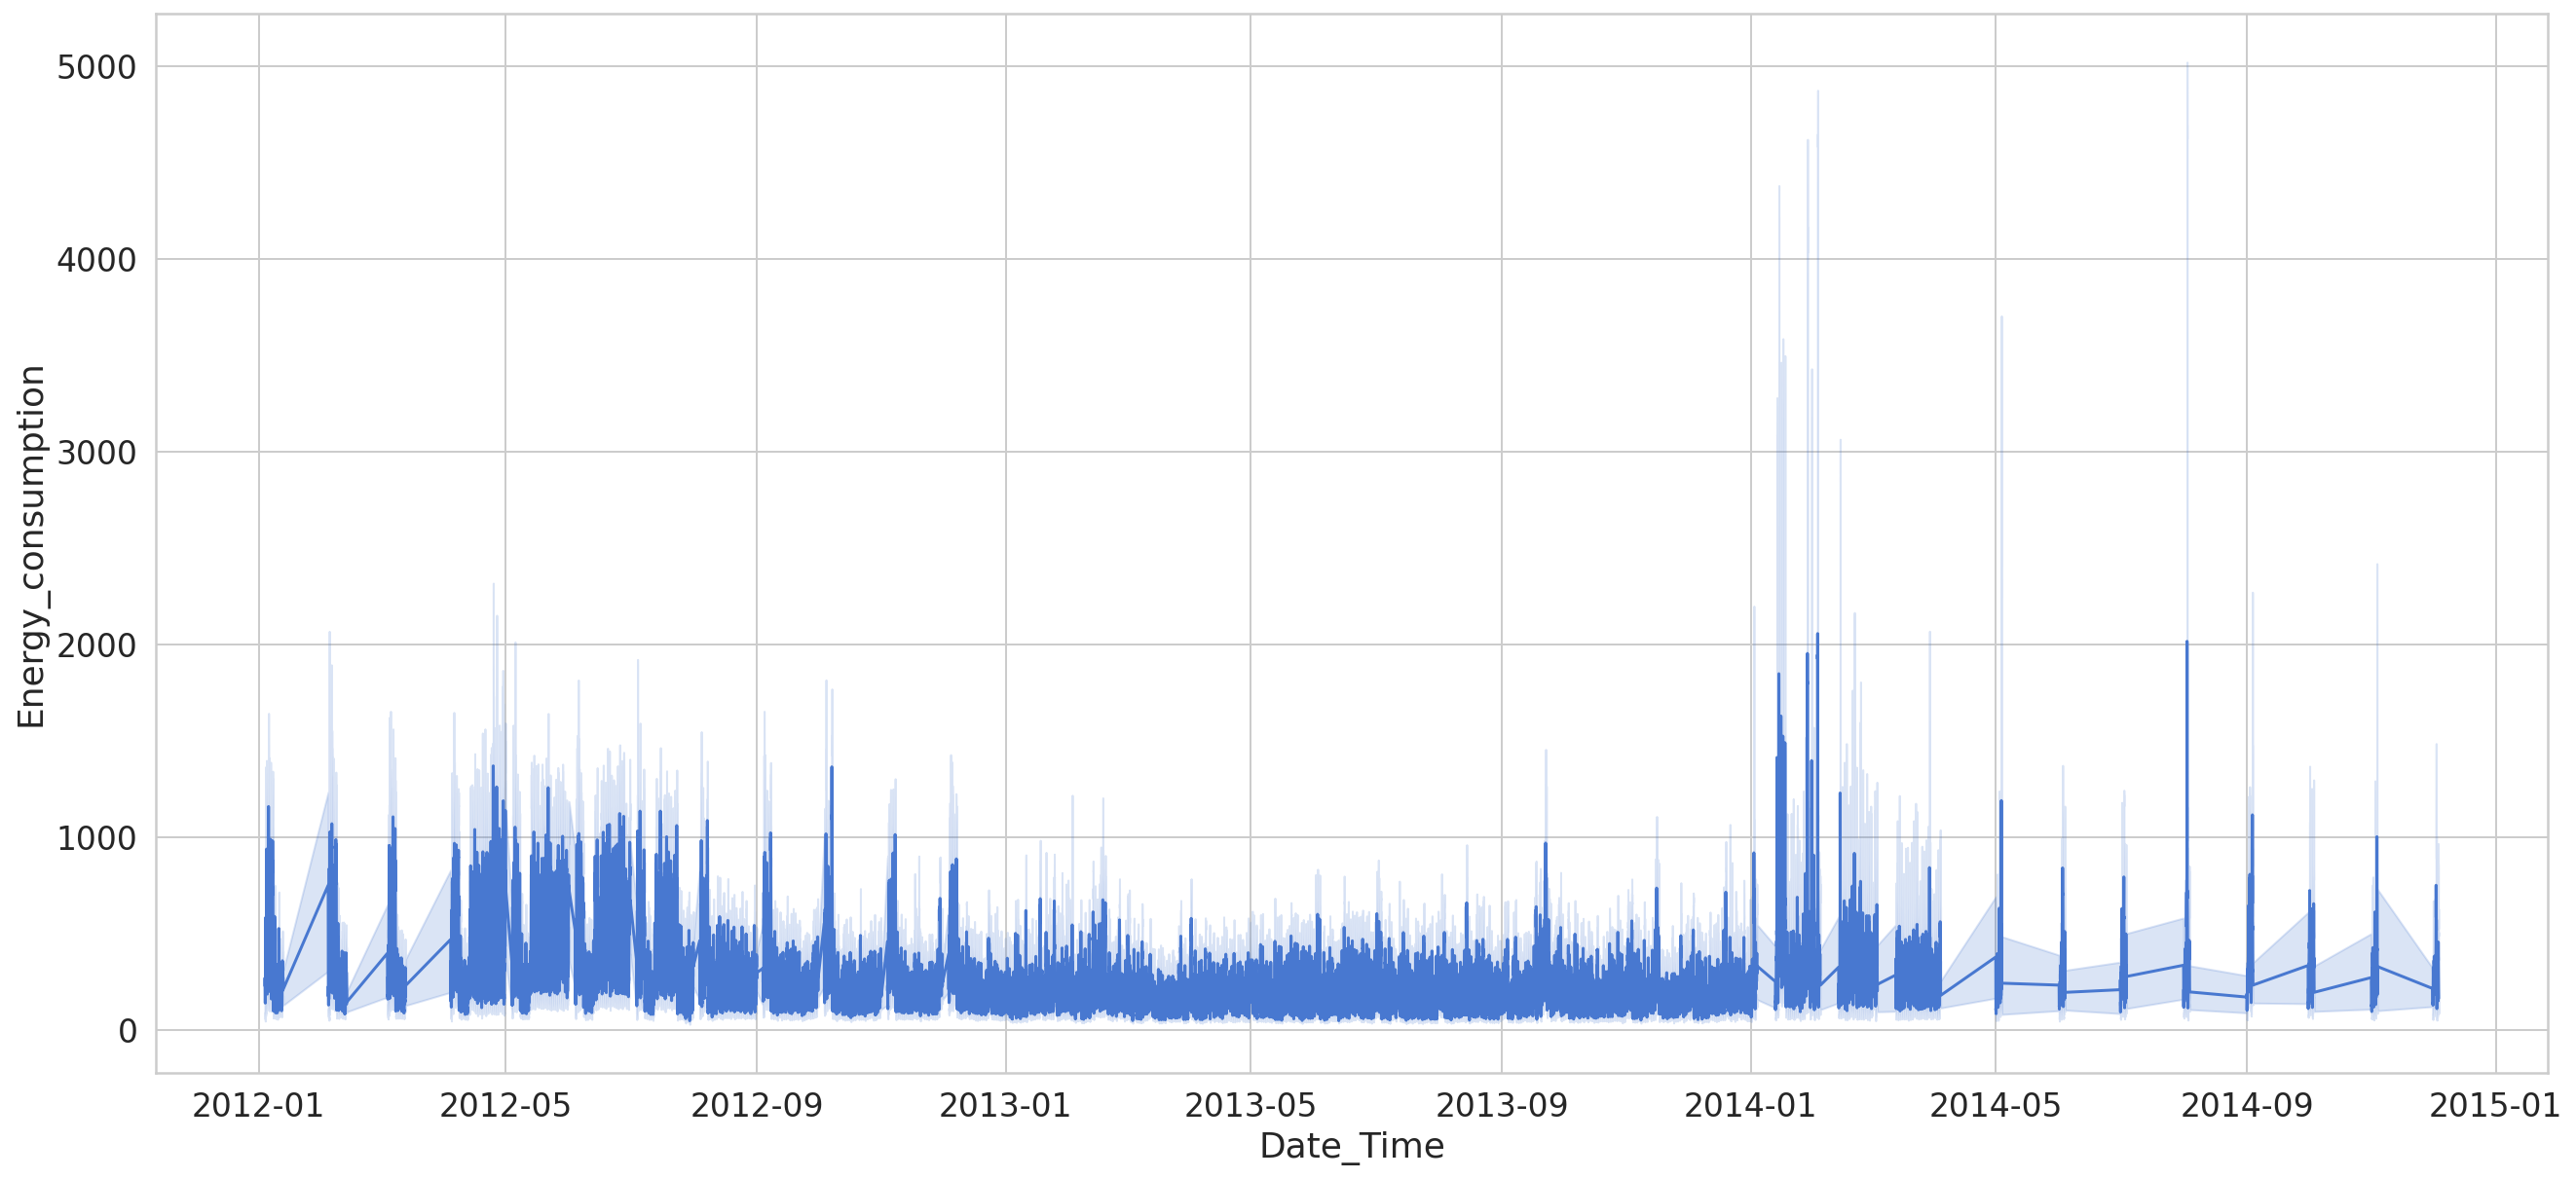

In [11]:
sns.lineplot(x=df.index, y="Energy_consumption", data=df);

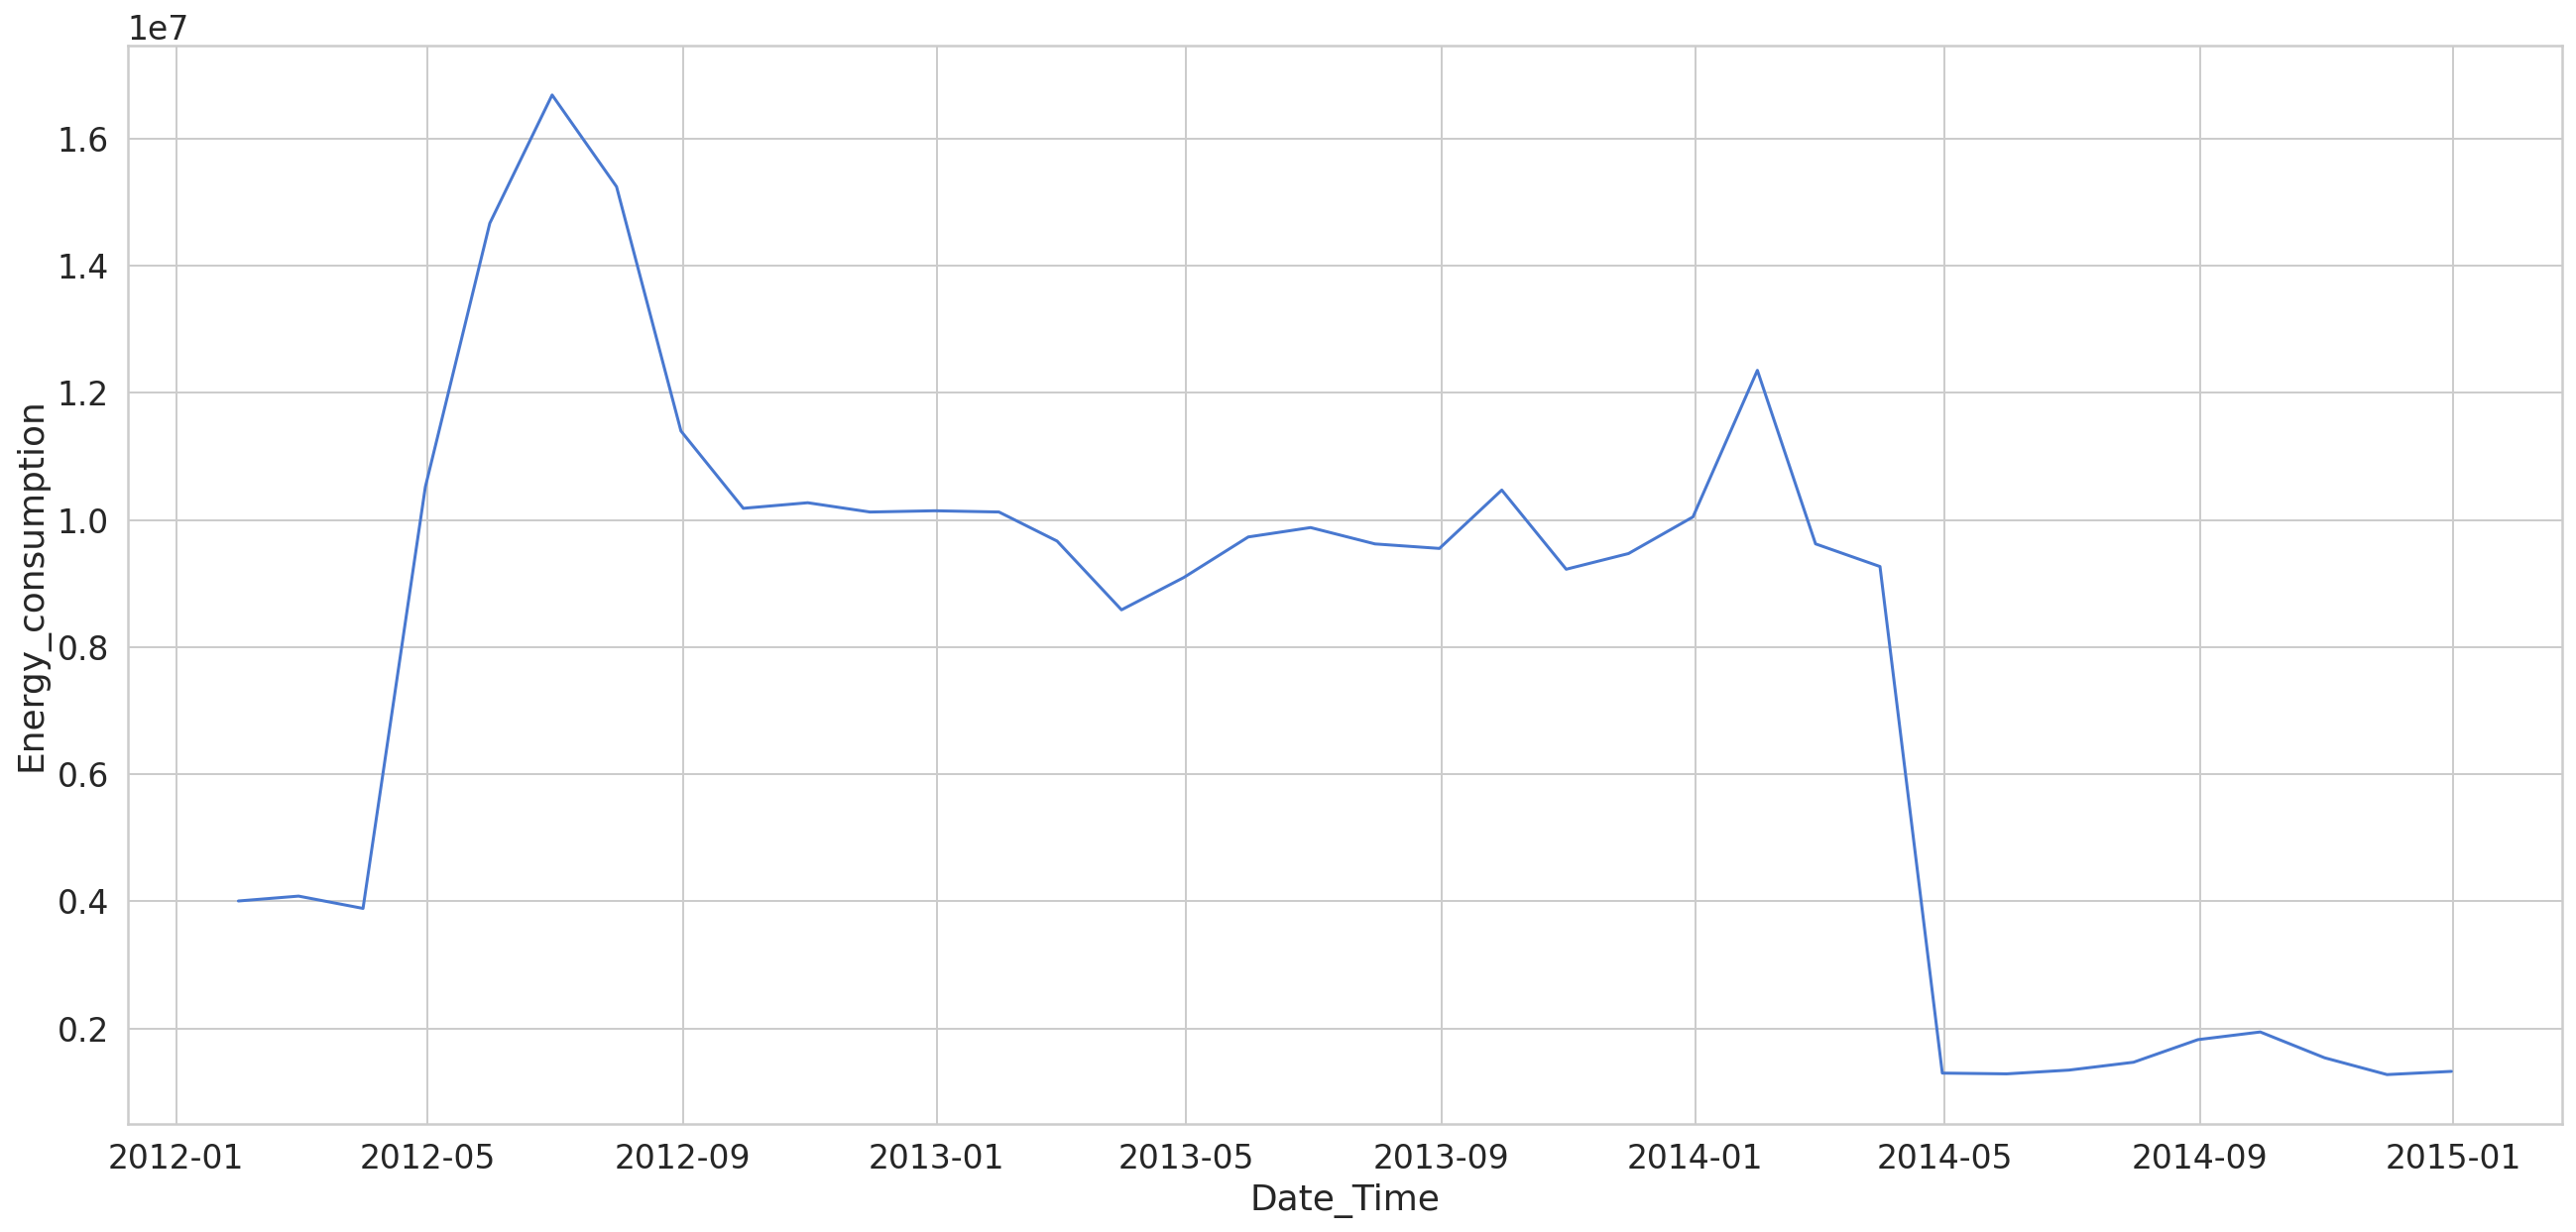

In [12]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="Energy_consumption", data=df_by_month);

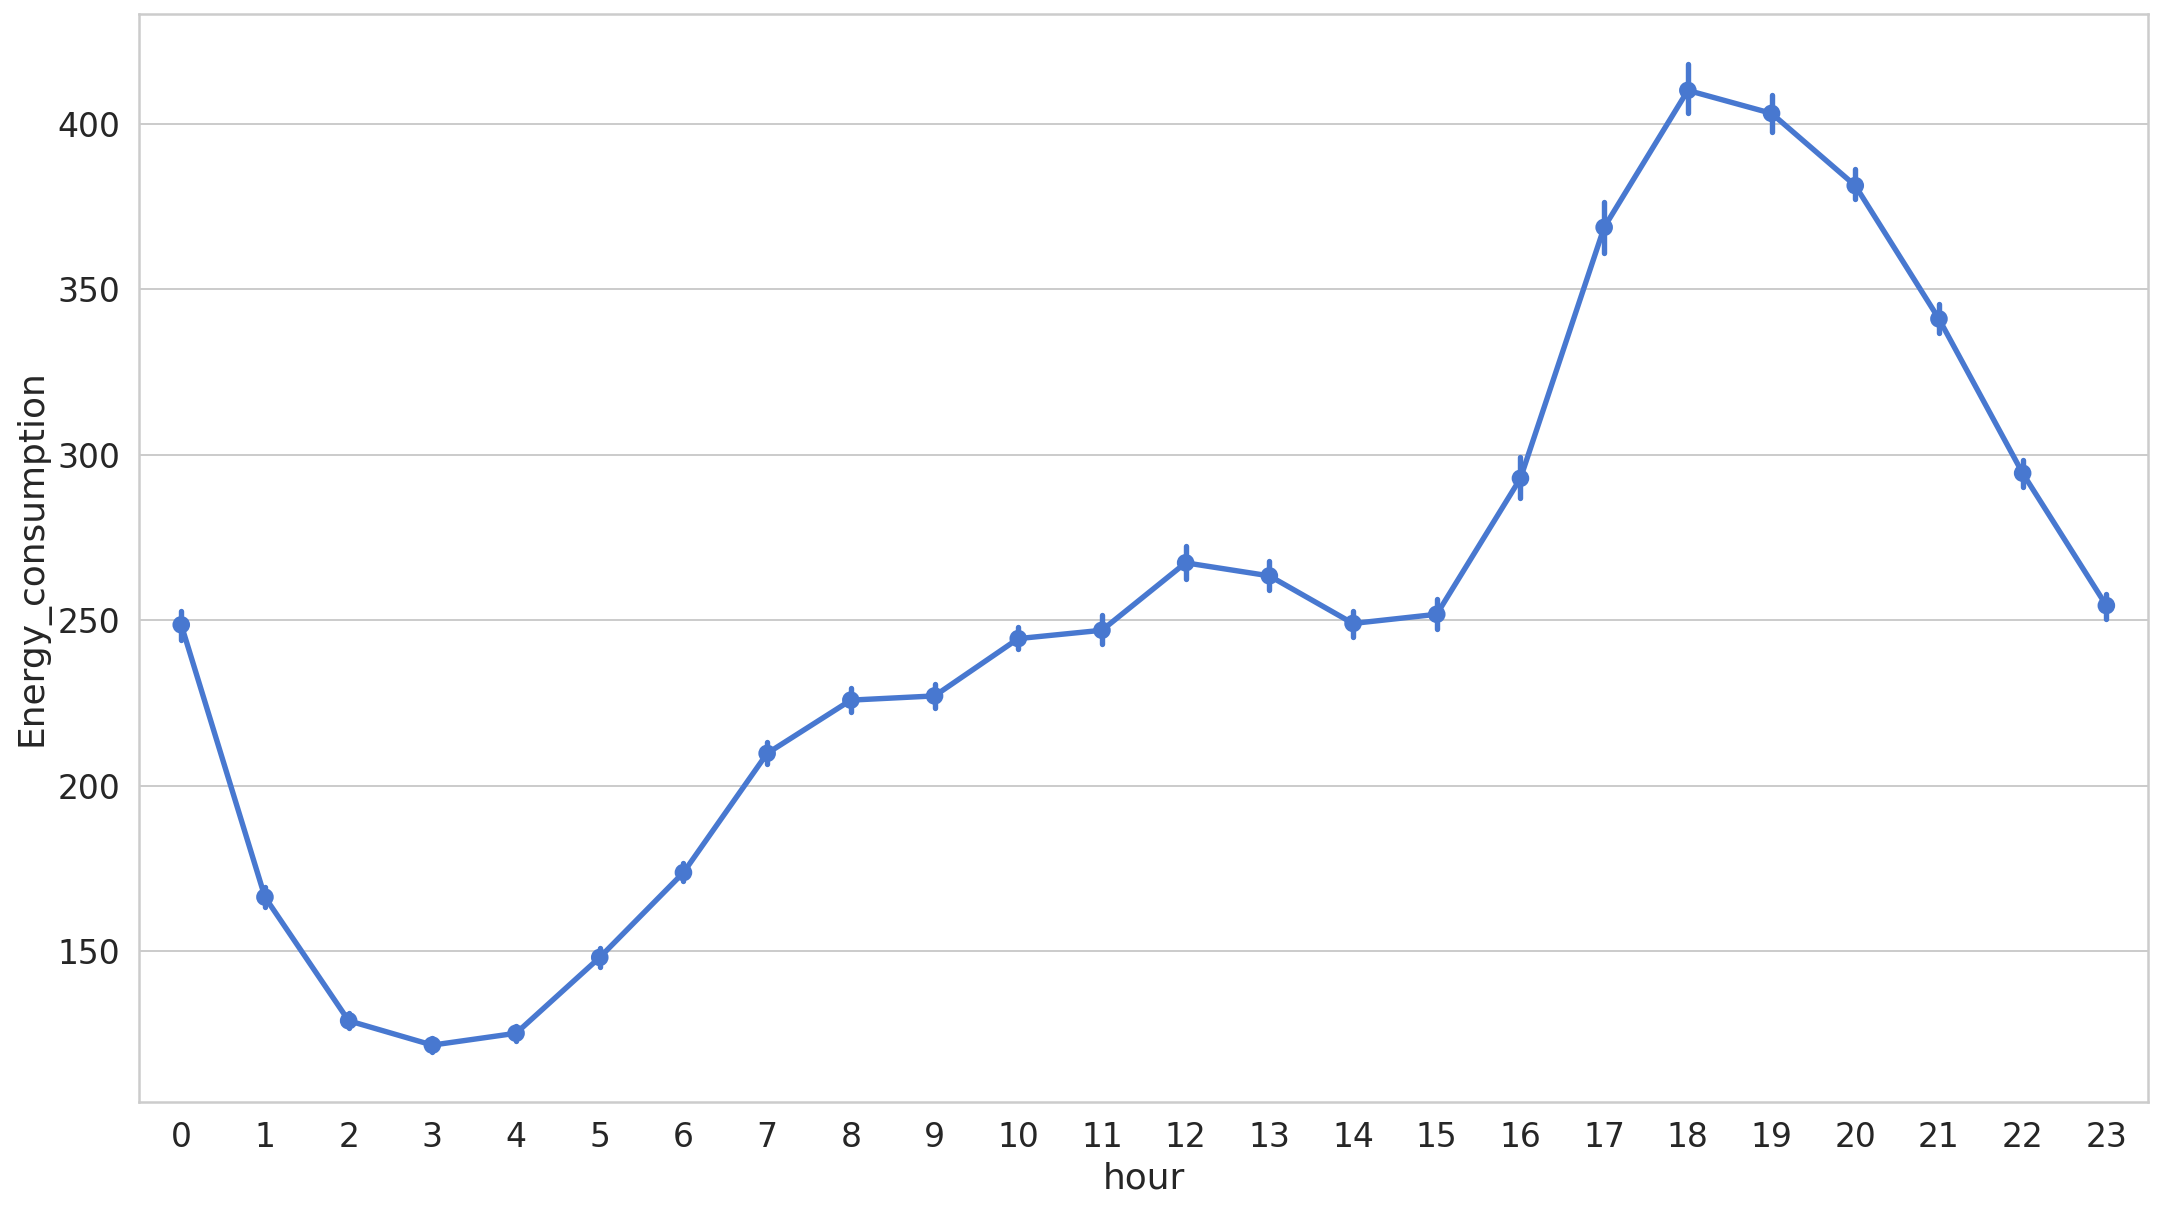

In [14]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18, 10)

sns.pointplot(data=df, x='hour', y='Energy_consumption', ax=ax1)

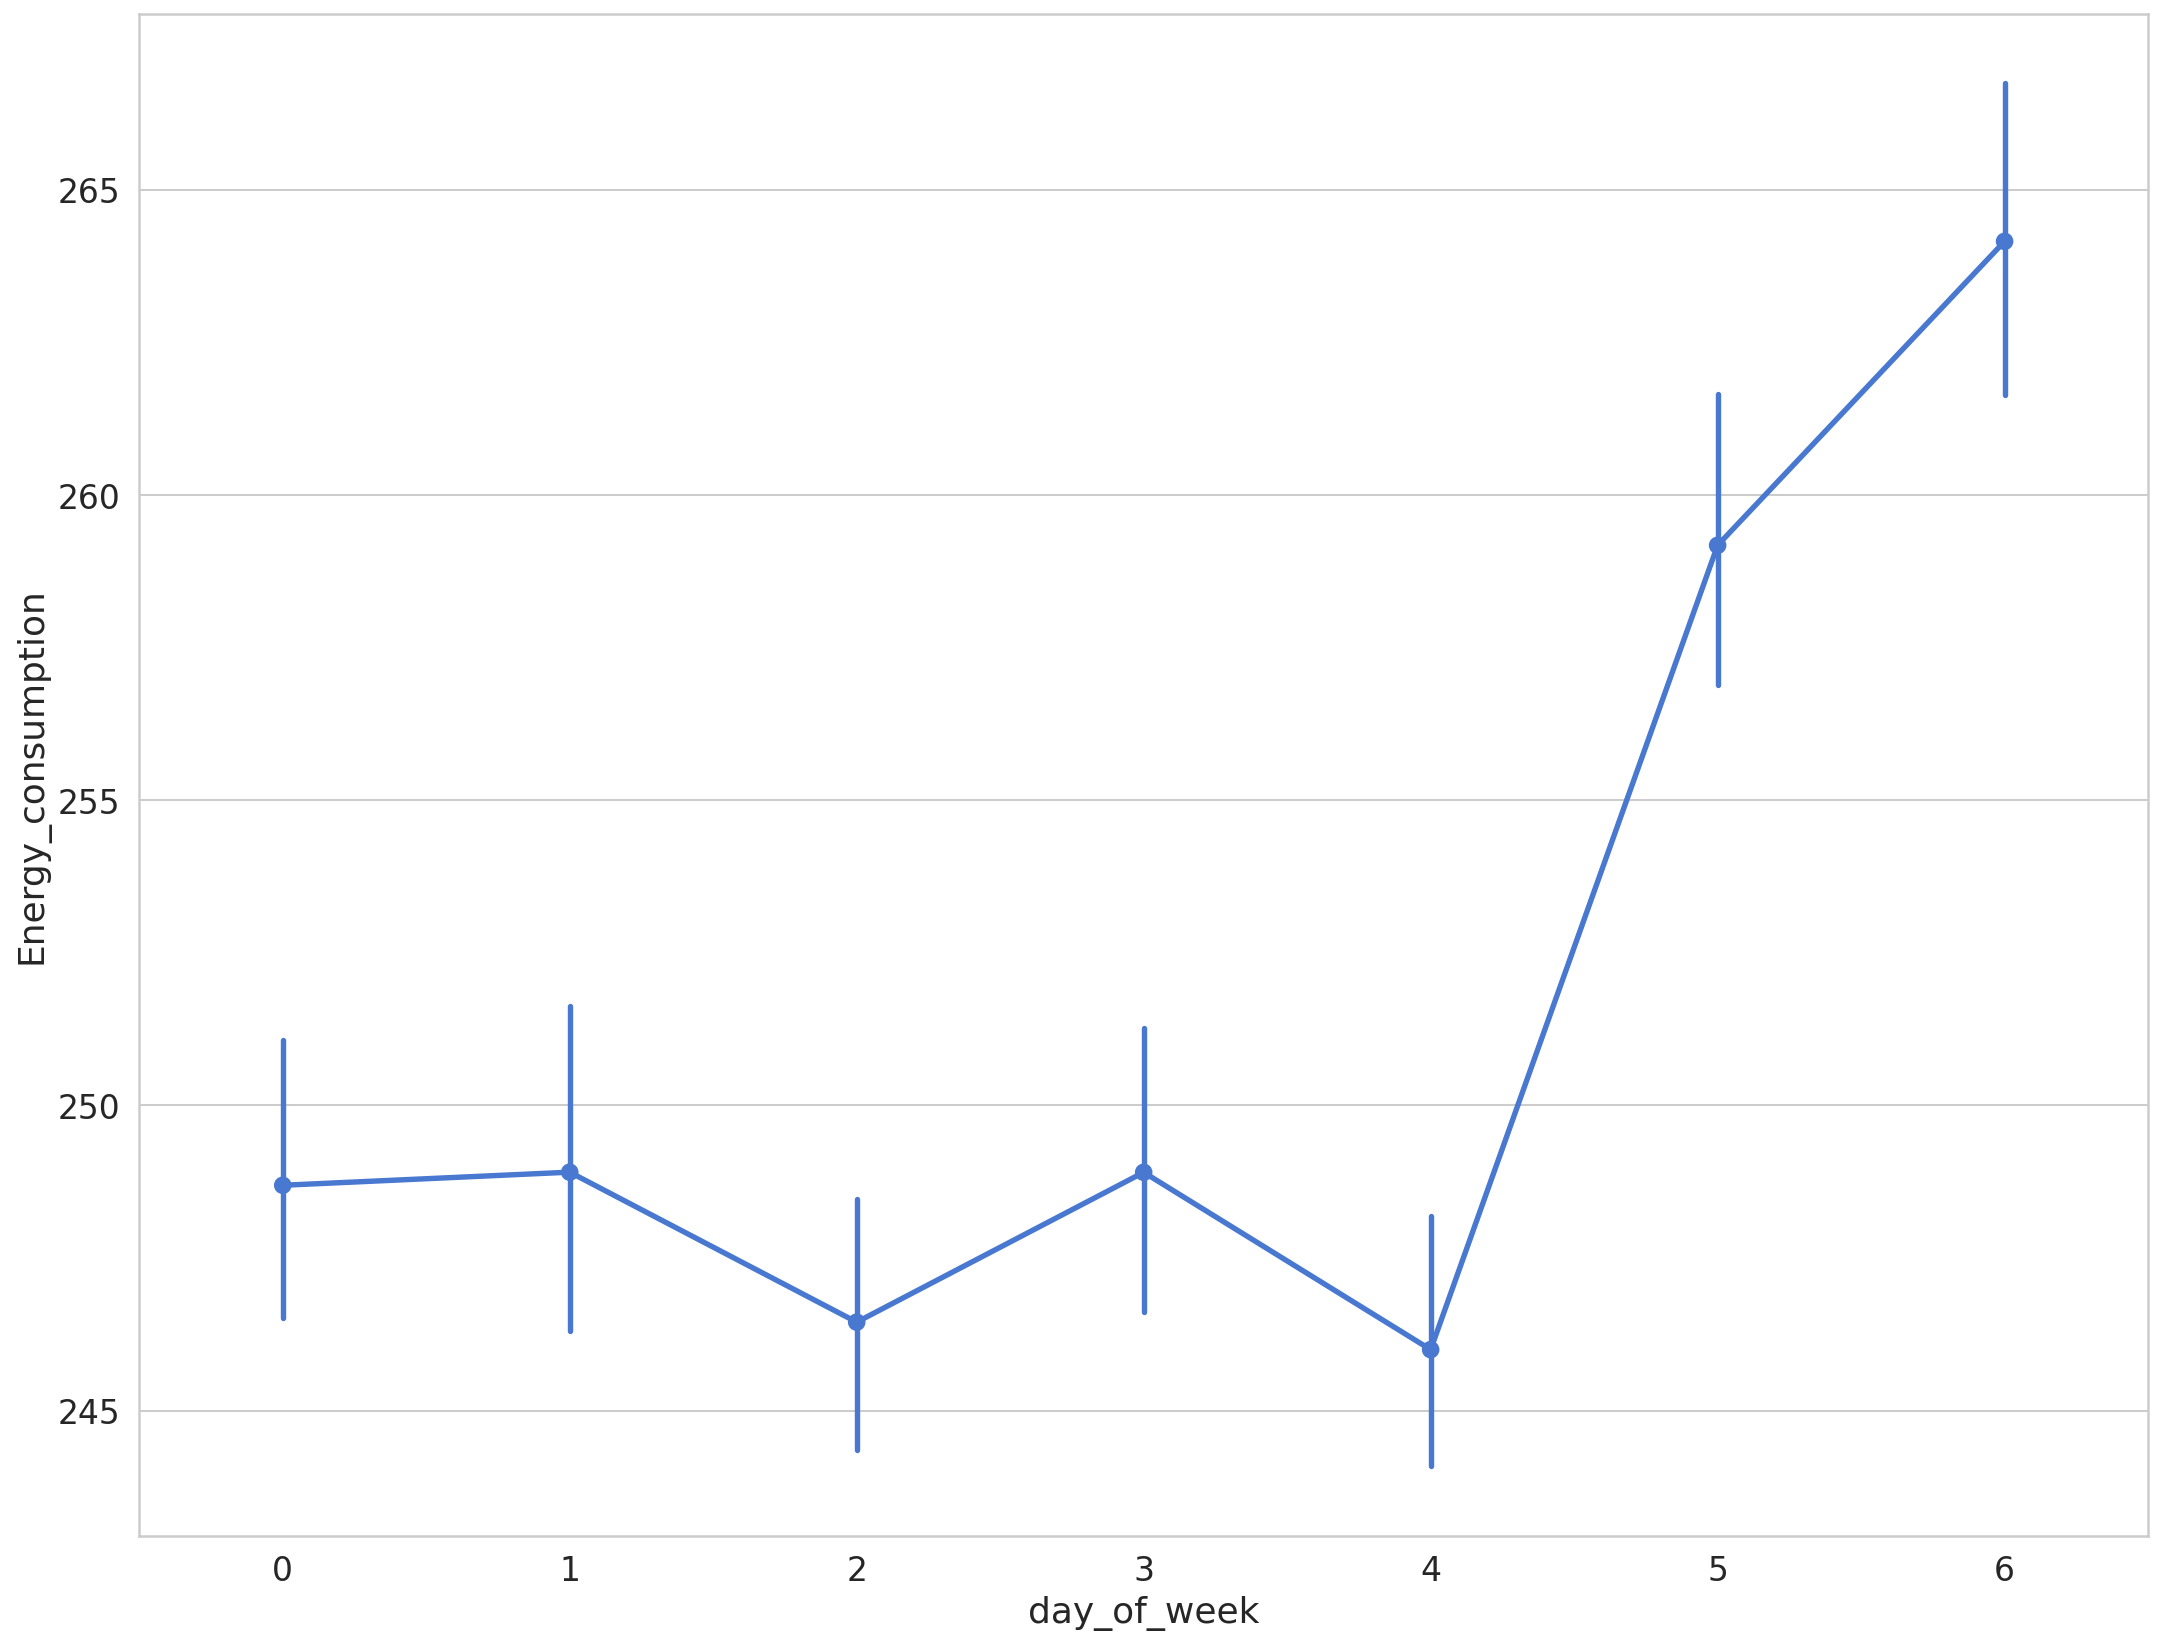

In [15]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18, 14)

sns.pointplot(data=df, x='day_of_week', y='Energy_consumption', ax=ax1)

In [24]:
df2 = df[["Energy_consumption"]]
train_size = int(len(df2) * 0.8)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df2)]
print(len(train), len(test))
train

893998 223500


,Energy_consumption
Date_Time,
2012-01-04 00:00:00,426
2012-02-04 00:00:00,1872
2012-03-04 00:00:00,766
2012-04-04 00:00:00,696
2012-05-04 00:00:00,632
...,...
2013-04-07 19:00:00,50
2013-05-07 18:30:00,30
2013-05-07 19:00:00,25


In [25]:
from sklearn.preprocessing import RobustScaler

# f_columns = ['t1', 't2', 'hum', 'wind_speed']

# f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

# f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Energy_consumption']])

# train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Energy_consumption'] = cnt_transformer.transform(train[['Energy_consumption']])

# test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Energy_consumption'] = cnt_transformer.transform(test[['Energy_consumption']])

In [26]:
train

,Energy_consumption
Date_Time,
2012-01-04 00:00:00,1.4909
2012-02-04 00:00:00,8.0636
2012-03-04 00:00:00,3.0364
2012-04-04 00:00:00,2.7182
2012-05-04 00:00:00,2.4273
...,...
2013-04-07 19:00:00,-0.2182
2013-05-07 18:30:00,-0.3091
2013-05-07 19:00:00,-0.3318


In [27]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [28]:
time_steps = 48

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Energy_consumption, time_steps)
X_test, y_test = create_dataset(test, test.Energy_consumption, time_steps)

print(X_train.shape, y_train.shape)

(893950, 48, 1) (893950,)


In [29]:
X_train

array([[[ 1.49090909],
        [ 8.06363636],
        [ 3.03636364],
        ...,
        [-0.44545455],
        [-0.44545455],
        [-0.44545455]],

       [[ 8.06363636],
        [ 3.03636364],
        [ 2.71818182],
        ...,
        [-0.44545455],
        [-0.44545455],
        [-0.44545455]],

       [[ 3.03636364],
        [ 2.71818182],
        [ 2.42727273],
        ...,
        [-0.44545455],
        [-0.44545455],
        [-0.44545455]],

       ...,

       [[-0.3       ],
        [ 5.06363636],
        [ 1.12272727],
        ...,
        [-0.24545455],
        [-0.21818182],
        [-0.30909091]],

       [[ 5.06363636],
        [ 1.12272727],
        [-0.24545455],
        ...,
        [-0.21818182],
        [-0.30909091],
        [-0.33181818]],

       [[ 1.12272727],
        [-0.24545455],
        [-0.25      ],
        ...,
        [-0.30909091],
        [-0.33181818],
        [-0.03636364]]])

In [30]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
16434/25143 [==================>...........] - ETA: 15:43 - loss: 1.2992